In [1]:
import os

In [2]:
import fnmatch

def find_files(path, pattern):
    for root, dirs, files in os.walk(path):
        for file in fnmatch.filter(files, pattern):
            yield os.path.join(root, file)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compute_class_distribution(list_tiff, plot=False):
    """
    Computes the class distribution of a NumPy array and optionally plots the results.
    
    Args:
        array (ndarray): The input NumPy array.
        plot (bool): Whether to plot the class distribution or not. Default is False.
        
    Returns:
        dict: A dictionary containing the class distribution, where the keys are the unique
              classes and the values are the corresponding counts.
    """
    
    final_array = np.empty(1)
    
    for tiff in list_tiff:
        # Open the TIFF image using PIL
        image = Image.open(tiff)

        # Convert the image to a NumPy array
        image_array = np.array(image)
    
        # Flatten the array to a 1D array
        flat_array = image_array.ravel()
    
        # Append the current array to final array
        final_array = np.append(final_array, flat_array.ravel())
        
    # Compute the unique classes and their counts
    classes, counts = np.unique(final_array, return_counts=True)

    # Create a dictionary to store the class distribution
    class_distribution = dict(zip(classes, counts))
    
    # Force the output to avoid "null" values in the dataset
    class_distribution = {key:value for (key,value) in class_distribution.items() if key in [1,2,3,4,5,6,7,8,9,10,11,12,13]}

    # Plot the class distribution if requested
    if plot:
        # Create the bar chart
        plt.bar(classes, counts)

        # Add labels and title
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title('Class Distribution')
        x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
        default_x_ticks = range(len(x))
        plt.xticks(default_x_ticks, x)
        plt.xlim(0.0, 13.0)

        # Show the plot
        plt.show()
    
    return class_distribution


# Class distribution

## Train distribution

In [4]:
# Get a list of path to train images
train_folder = '/home/tgrippa/project/weak_flair/subset_dataset/train'
train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "MSK_*.tif")]
print(f'There are {len(train_tupple)} train images')

There are 0 train images


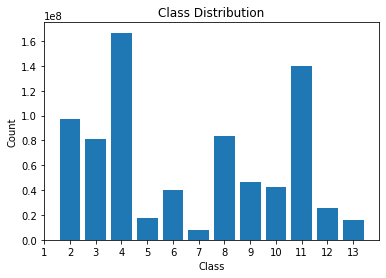

In [94]:
list_tiff = [x[1] for x in train_tupple[:]]
class_distribution = compute_class_distribution(list_tiff, plot=True)

## Test distribution

In [85]:
# Get a list of path to train images
train_folder = '/home/tgrippa/project/weak_flair/subset_dataset/test'
train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "MSK_*.tif")]
print(f'There are {len(train_tupple)} test images')

There are 500 test images


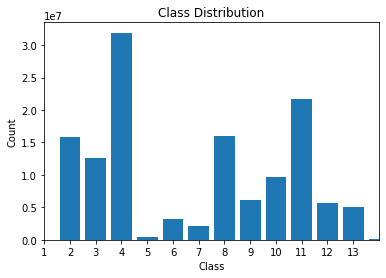

In [86]:
list_tiff = [x[1] for x in train_tupple[:]]
class_distribution = compute_class_distribution(list_tiff, plot=True)

# Class distribution on NDVI

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def concat_csv_stats(csvfile_list):
    # Create an empty list to store the data frames for each csv
    frames = []

    # Iterate over the file list
    for file in csvfile_list:
        # Read the CSV file into a data frame
        df = pd.read_csv(file)
        frames.append(df)
    
    # Concatenate all the dataframes       
    data = pd.concat(frames)
    return data

def plot_density_curves(dataframe, class_column, x_column, xlim=None):
    """
    Reads a list of CSV files containing statistics tables and plots different curves based on the different classes.
    
    Args:
        csvfile_list (list): List of file paths to CSV files.
        class_column (str): Column name containing the classes.
        x_column (str): Column name containing the x-values for the curves.
    """   
    # Draw the density plot
    plt.figure(figsize=(15,8))
    sns.kdeplot(dataframe, bw_adjust=.5, x=x_column, hue=class_column, palette="tab20")

    # Set the plot title and labels
    plt.title('Density plot of "%s" values'%x_column)
    plt.xlabel(x_column)
    if xlim:
        plt.xlim(xlim)

In [8]:
# Get a list of path to train images
train_folder = '/home/tais/result/stats'
#train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "stats_IMG_*.csv")]
train_tupple = [x for x in find_files(train_folder, "stats_IMG_*.csv")]
print(f'There are {len(train_tupple)} csv')

There are 2950 csv


In [90]:
# Concatenate all the csv 
data = concat_csv_stats(train_tupple)

In [106]:
# List of dataframe columns
print(' | '.join(data.columns))

cat | area | perimeter | compact_circle | compact_square | fd | red_stddev | red_coeff_var | red_sum | red_median | red_perc_90 | green_stddev | green_coeff_var | green_sum | green_median | green_perc_90 | blue_stddev | blue_coeff_var | blue_sum | blue_median | blue_perc_90 | nir_stddev | nir_coeff_var | nir_sum | nir_median | nir_perc_90 | ndvi_stddev | ndvi_coeff_var | ndvi_sum | ndvi_median | ndvi_perc_90 | ndsm_stddev | ndsm_coeff_var | ndsm_sum | ndsm_median | ndsm_perc_90 | text_green_DE_stddev | text_green_DE_coeff_var | text_green_DE_sum | text_green_DE_median | text_green_DE_perc_90 | text_green_Entr_stddev | text_green_Entr_coeff_var | text_green_Entr_sum | text_green_Entr_median | text_green_Entr_perc_90 | text_red_ASM_stddev | text_red_ASM_coeff_var | text_red_ASM_sum | text_red_ASM_median | text_red_ASM_perc_90 | text_red_IDM_stddev | text_red_IDM_coeff_var | text_red_IDM_sum | text_red_IDM_median | text_red_IDM_perc_90 | text_nir_DE_stddev | text_nir_DE_coeff_var | text_n

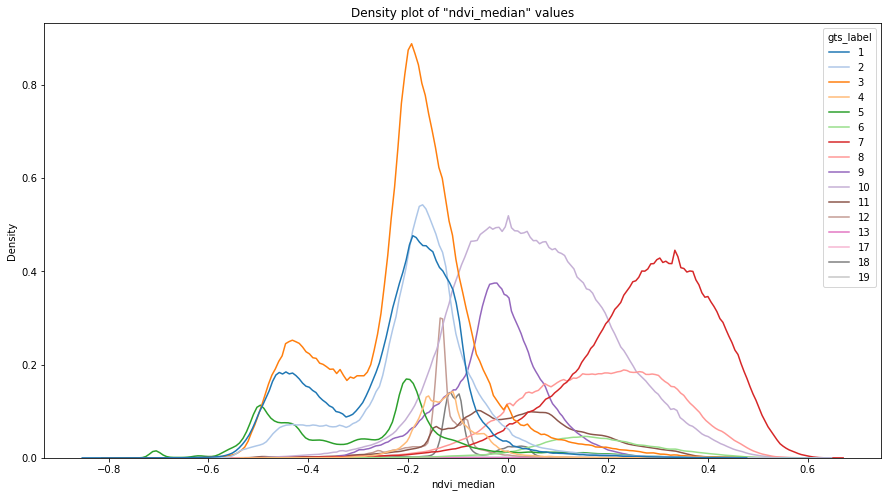

In [105]:
# Plot density curves
plot_density_curves(data, class_column="gts_label", x_column="ndvi_median")

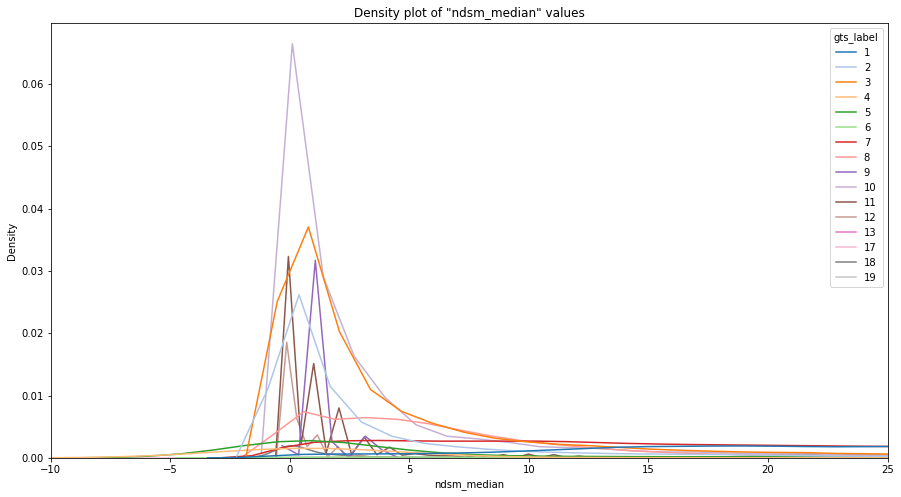

In [113]:
# Plot density curves
plot_density_curves(data, class_column="gts_label", x_column="ndsm_median",xlim=(-10,25))